In [161]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
 
df = pd.read_csv("./data/bank-additional-1.csv", header=0,nrows =3999)
df = df.dropna()
print(df.shape)
print(list(df.columns))
 
df.head()

(3999, 6)
['age', 'duration', 'campaign', 'pdays', 'previous', 'y']


,age,duration,campaign,pdays,previous,y
0,56,261,1,999,0,no
1,57,149,1,999,0,no
2,37,226,1,999,0,no
3,40,151,1,999,0,no
4,56,307,1,999,0,no


In [162]:
df=df.sample(n=3999)

In [163]:
df

,age,duration,campaign,pdays,previous,y
3198,52,191,1,999,0,no
3717,46,56,3,999,0,no
286,39,935,3,999,0,yes
1055,35,381,2,999,0,no
1547,34,466,2,999,0,no
...,...,...,...,...,...,...
263,43,73,3,999,0,no
1657,25,498,1,999,0,no
590,32,1906,3,999,0,no
2838,29,125,1,999,0,no


In [164]:
print(df['y'].value_counts())
print(df['y'].value_counts()/len(df))

no     3888
yes     111
Name: y, dtype: int64
no     0.972243
yes    0.027757
Name: y, dtype: float64


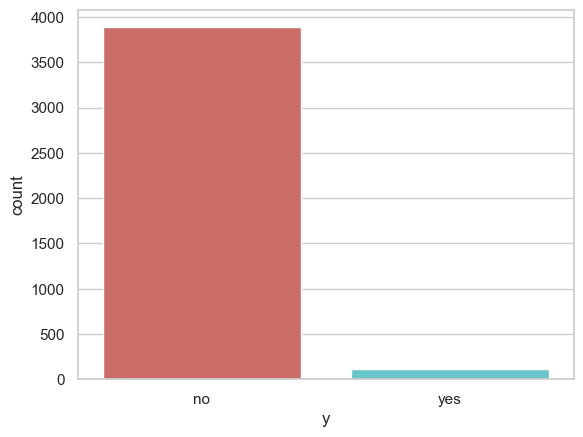

In [165]:
sns.countplot(x='y',data=df, palette='hls')
plt.show()

In [166]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous
y,,,,,
no,40.761317,249.978138,2.248457,999.0,0.0
yes,40.027027,989.207207,2.108108,999.0,0.0


In [167]:
X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
 
#在测试集上进行预测
y_pred = logreg.predict(X_test)
print('在测试集上预测的准确率: {:.2f}'.format(logreg.score(X_test, y_test)))

在测试集上预测的准确率: 0.97


D:\Program\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [168]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1158   10]
 [  24    8]]


In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.98      0.99      0.99      1168
         yes       0.44      0.25      0.32        32

    accuracy                           0.97      1200
   macro avg       0.71      0.62      0.65      1200
weighted avg       0.97      0.97      0.97      1200

